# Customer Transaction Prediction

Problem Statement

Santander wants to find which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

 Target Variabe -  Discrete valued (0,1)
 0- Customer do not make transaction
 1- Customer does make a transaction

## Dataset has 200000 Records

In [28]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import necessary libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sb

## Import dataset 

In [73]:
trans = pd.read_csv("PRCP-1003-CustTransPred/Data/train.csv")
trans.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


#  EDA

### Drop irrelavant column - ID_code

In [74]:
trans.drop('ID_code',axis=1,inplace = True)

In [5]:
trans.head()    #ID column is droped from the dataset

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Describing the independent variables

In [6]:
trans.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


#### It can be found that data is varying heavily with Max value is differing heavily with 75% value

In [7]:
# list the number of unique values in each feature variable
trans.nunique()

target          2
var_0       94672
var_1      108932
var_2       86555
var_3       74597
            ...  
var_195     57870
var_196    125560
var_197     40537
var_198     94153
var_199    149430
Length: 201, dtype: int64

In [8]:
trans.shape   #20000 Records with 201 columns

(200000, 201)

In [9]:
trans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [10]:
trans = trans.loc[:,~trans.columns.duplicated(keep = 'first')]  # Check for column duplicates and remove them

In [11]:
duplicate = trans[trans.duplicated(keep = 'first')]  #Check for row duplicates

In [12]:
duplicate  #No duplicate rows

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [13]:
trans.isnull().sum()   #Check for NULL Value

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

#### There are no null values, no duplicate rows and no duplicate columns

### Count plot for Targer variable

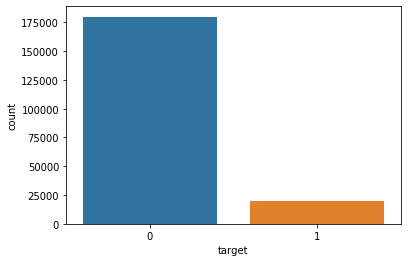

In [14]:
sb.countplot(trans['target'])

## Imbalanced Data, we shall use SMOTE later

### Distribution of features

In [15]:
# Splitting rows based on the target value
t0= trans[trans['target']==0]
t1 = trans[trans['target']==1]

Distribution of first 30  features


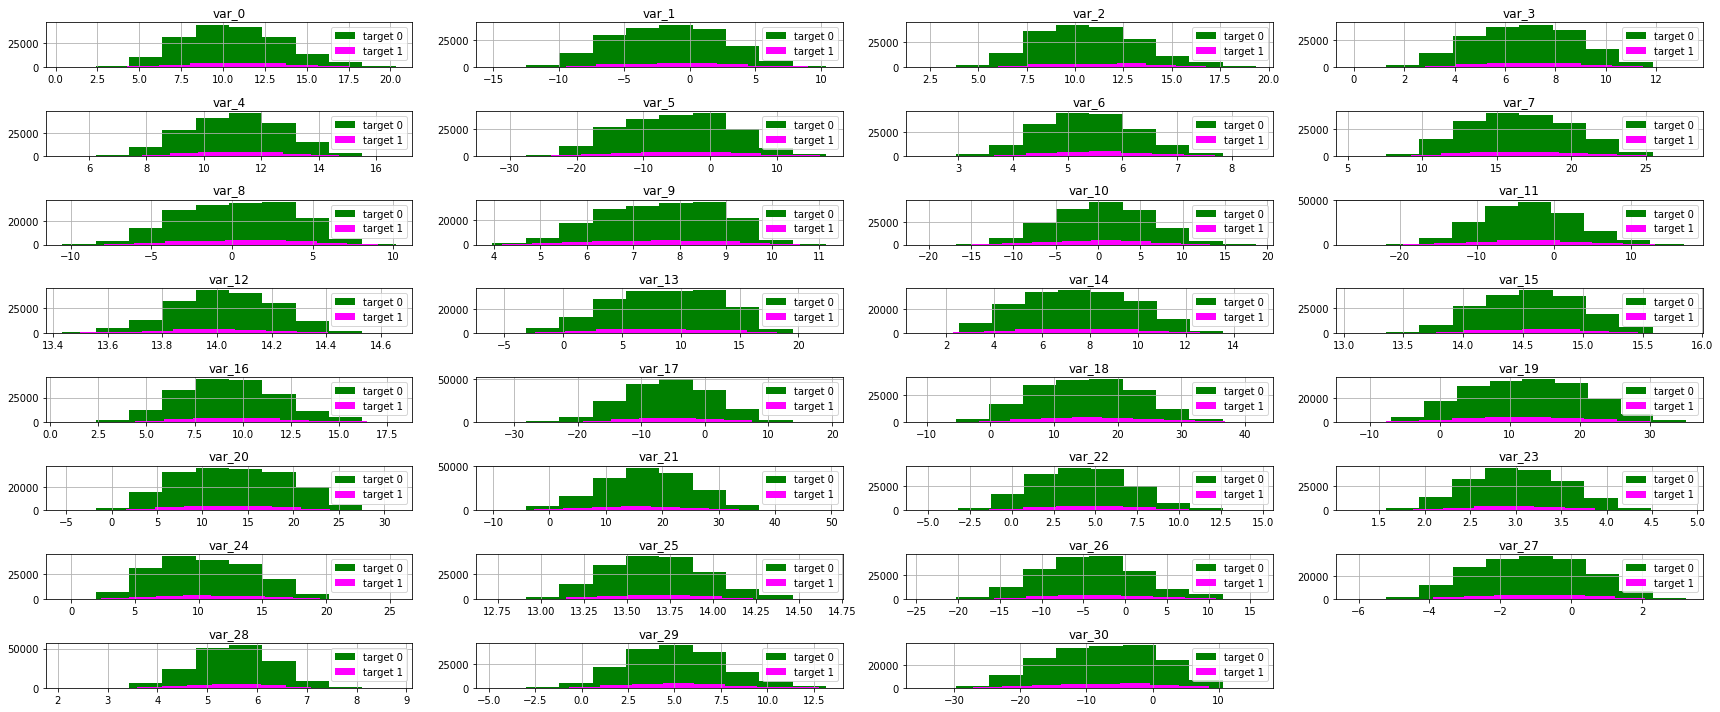

In [16]:
import matplotlib.pyplot as plt

print("Distribution of first 30  features")
plt.figure(figsize=(24,10))
for index, col in enumerate(list(trans.columns)[1:32]):
    plt.subplot(8,4,index+1)
    plt.hist(t0[col],label='target 0',color = 'green')
    plt.hist(t1[col],label='target 1', color = 'magenta')
    plt.title(col)
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.tight_layout()

Relational Plot

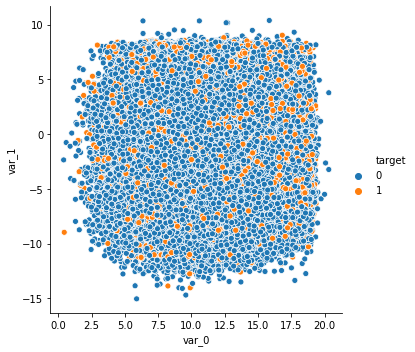

In [17]:
sb.relplot(x='var_0',y='var_1',hue='target',data=trans)

### Feature Engineering

In [75]:
X = trans.iloc[:,1:]
y = trans['target']
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### PCA

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.42785307, 0.32482435, 0.56805853, ..., 0.43095798, 0.32765751,
        0.56064496],
       [0.55721218, 0.42863943, 0.6812351 , ..., 0.4682771 , 0.6095461 ,
        0.60582746],
       [0.41196889, 0.48377668, 0.57806091, ..., 0.38194973, 0.42583343,
        0.58273586],
       ...,
       [0.5432771 , 0.39305749, 0.4870996 , ..., 0.45612437, 0.38087342,
        0.63919915],
       [0.46750324, 0.25309006, 0.66682332, ..., 0.67445942, 0.46661746,
        0.37047369],
       [0.5258457 , 0.36714503, 0.580254  , ..., 0.36840624, 0.29469964,
        0.57890533]])

In [79]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [80]:
from sklearn.decomposition import PCA

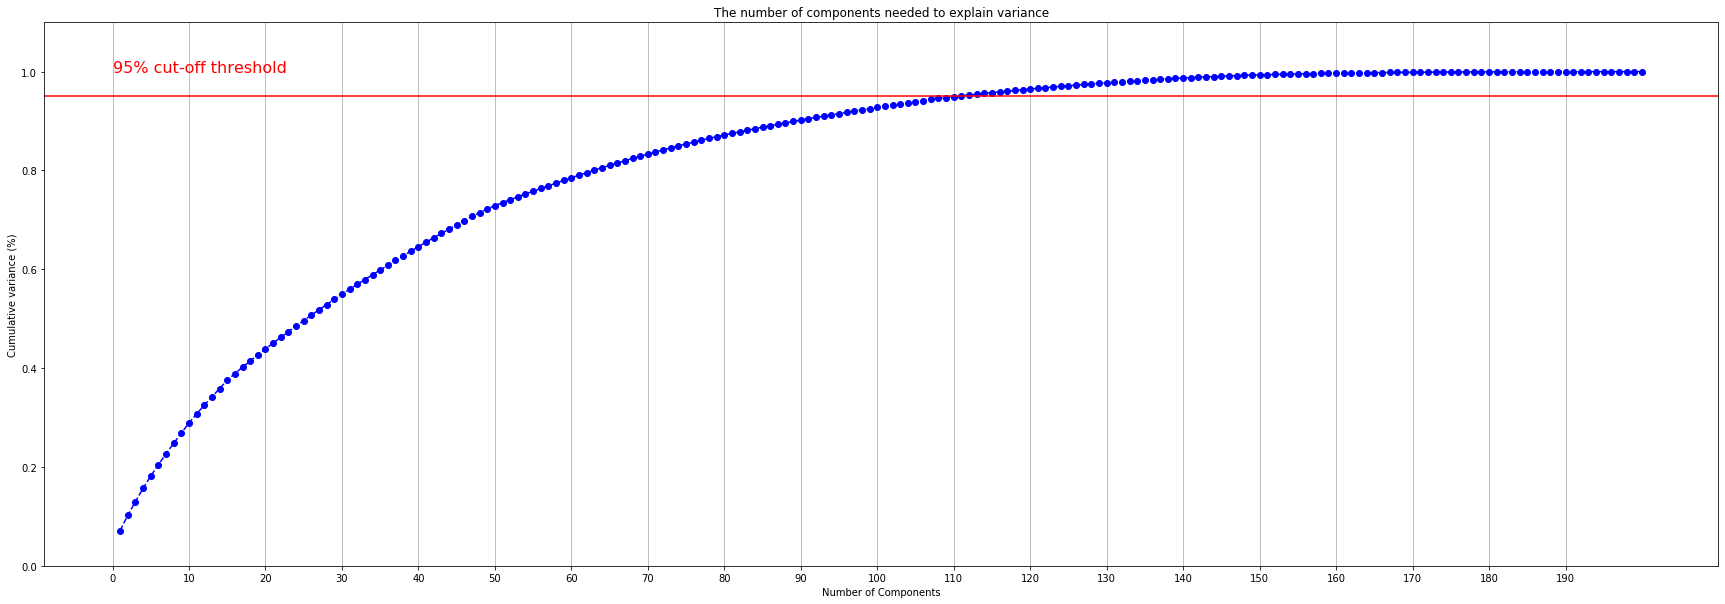

In [81]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (30,10)

fig, ax = plt.subplots()
xi = np.arange(1, 201, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0, 1, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [21]:
pca.explained_variance_ratio_

array([0.00750316, 0.00686007, 0.00678445, 0.00676263, 0.0066864 ,
       0.00661722, 0.00659769, 0.00655239, 0.00652154, 0.0064378 ,
       0.00638433, 0.00637278, 0.00635966, 0.00633579, 0.00627186,
       0.00624062, 0.00618411, 0.00615254, 0.00613899, 0.00611428,
       0.00609037, 0.00608068, 0.00607311, 0.00604961, 0.00602911,
       0.00600873, 0.00598436, 0.00593875, 0.00593338, 0.00592493,
       0.00590046, 0.00588622, 0.00588525, 0.00587711, 0.00587348,
       0.00583895, 0.00582535, 0.0058166 , 0.00579022, 0.00577976,
       0.00577009, 0.00574815, 0.00572876, 0.00570724, 0.00569999,
       0.00569022, 0.00566234, 0.00564598, 0.00562338, 0.00561324,
       0.00559787, 0.00558116, 0.0055738 , 0.00555363, 0.00552579,
       0.00551461, 0.00549612, 0.00547415, 0.00545815, 0.00544325,
       0.00543717, 0.00542991, 0.00541389, 0.00540447, 0.00538636,
       0.00538022, 0.00536401, 0.00536116, 0.00535865, 0.00534746,
       0.00533605, 0.00531956, 0.00530298, 0.00529619, 0.00527

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 110)
X = pd.DataFrame(pca.fit_transform(X))

In [83]:
X

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,-5.606469,-23.554422,-1.899695,5.221465,2.466725,-8.622214,2.713522,-15.071740,11.416796,1.583251,...,2.953090,-3.246915,4.629814,-1.723664,-4.568607,-8.392932,-0.236303,7.468199,-0.987995,-1.289444
1,34.878027,11.469302,-3.759777,-19.274546,-8.543838,6.984988,-15.539526,-2.989486,8.116777,19.065320,...,1.198020,-5.751640,-4.622259,0.761736,-6.738368,1.211741,-4.037780,-8.094597,3.786473,2.273735
2,-4.790239,-0.334224,11.359295,8.533325,1.328561,-3.218347,22.019422,-1.662195,-4.055754,6.217956,...,8.579413,1.791653,-0.171215,-1.105603,-4.942159,3.939787,-1.653509,2.010202,0.276424,-6.298192
3,11.875370,14.050794,24.017572,-4.419384,0.372756,5.805542,20.132614,12.235257,-1.442238,-14.343079,...,-0.376524,2.430897,-0.651214,0.704793,-5.501265,-4.890022,-1.685276,-2.353880,3.971326,-3.734392
4,52.713133,24.315349,4.334393,23.857652,-17.868922,16.346663,-15.373453,11.752704,-18.458745,-14.795758,...,2.035619,-4.334838,-1.605514,-3.783773,-0.186437,2.389112,6.313777,-0.082768,0.062148,7.734603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-10.724376,-1.958735,18.592167,0.293642,12.729418,-3.275306,-4.491853,8.566101,-7.255549,-22.982153,...,5.499074,0.796109,2.673968,-5.330857,0.923469,7.373224,2.386601,4.031838,-2.372038,-2.488228
199996,14.450776,-0.234333,-16.938290,19.531246,-14.598606,-2.182674,1.678207,0.957461,8.627240,11.098209,...,0.857297,-5.323933,2.377290,5.863602,5.317066,-0.280448,4.071338,4.862732,-4.600309,0.782981
199997,36.842270,7.760052,30.232209,-9.884380,7.401203,4.181945,-1.550899,-5.243038,-3.429376,2.323698,...,2.850696,2.008420,-2.394702,-5.318311,4.815503,-2.968004,-2.377626,0.734806,-1.198596,1.487796
199998,30.230916,-24.423506,25.553552,22.586008,-8.758014,-5.847816,1.114579,3.364141,8.653283,11.481312,...,2.702632,-5.691980,5.472987,2.341240,-6.981050,1.642270,4.034648,1.432586,8.311521,3.305736


In [57]:
X.kurtosis()

0     -0.602512
1     -0.385818
2     -0.463270
3     -0.662539
4     -0.681483
         ...   
105   -0.584402
106   -0.306940
107   -0.253303
108   -0.286626
109   -0.601540
Length: 110, dtype: float64

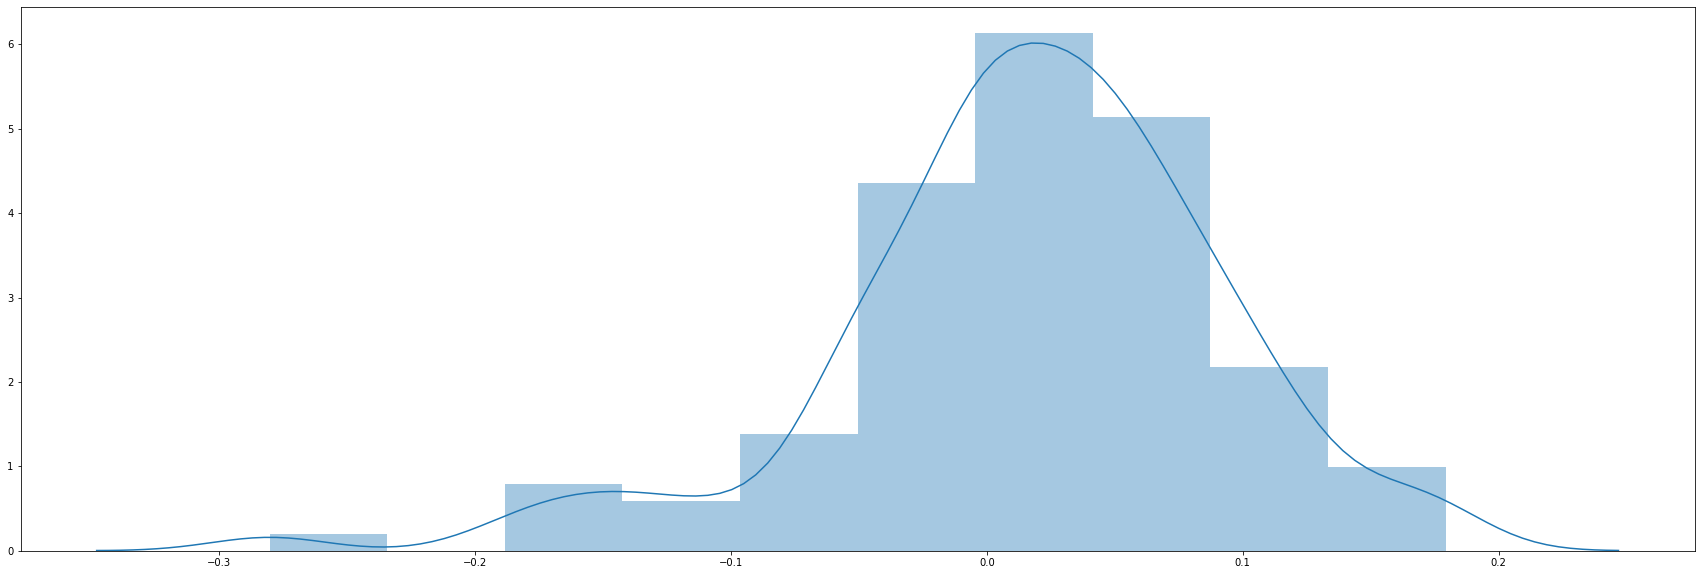

In [58]:
sb.distplot(X.skew(),bins=10)   # Distribution plot

### Data is Negatively Skewed

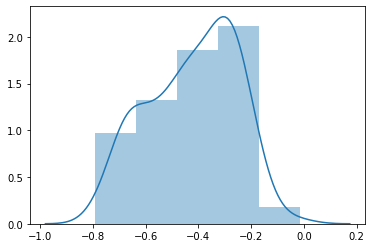

In [117]:
sb.distplot(X.kurtosis(),bins=5)

In [89]:
corr = X.corr()

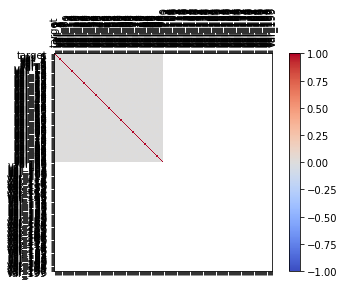

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(trans.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(trans.columns)
ax.set_yticklabels(trans.columns)
plt.show()

Correlation Analysis – none of the features is correlated with each other (correlation factor nearly equal to 0 and the diagonal line
is the only dark part and the rest is white which shows that there is no correlation between any of the features in the dataset)

In [69]:
#Let's start with Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

Train and Test split of  X and Y data

In [84]:
X.shape

(200000, 110)

In [86]:
y = trans['target']
y.shape

(200000,)

In [87]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [88]:
X_train.shape

(140000, 110)

In [89]:
X_test.shape

(60000, 110)

### SMOTE

In [90]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

In [91]:
from collections import Counter
print("Actual classes ",  Counter(y_train))
print("SMOTE classes ", Counter(y_train_smote))

Actual classes  Counter({0: 125922, 1: 14078})
SMOTE classes  Counter({0: 125922, 1: 125922})


### Logistic Regression

In [92]:
lr = LogisticRegression()
lr.fit(X_train_smote,y_train_smote)
y_pred_smote = lr.predict(X_test)

In [93]:
accuracy_score(y_train_smote,lr.predict(X_train_smote))    #Training accuracy 

0.7303529168850559

In [94]:
accuracy_score(y_test,y_pred_smote)   #testing accuracy

0.7175666666666667

In [95]:
confusion_matrix(y_test,y_pred_smote)

array([[38888, 15092],
       [ 1854,  4166]], dtype=int64)

### Type 1 and Type 2 Errors. with Type II error at high

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     53980
           1       0.22      0.69      0.33      6020

    accuracy                           0.72     60000
   macro avg       0.59      0.71      0.58     60000
weighted avg       0.88      0.72      0.77     60000



### Without SMOTE

In [47]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [48]:
accuracy_score(y_train,lr.predict(X_train))  #training accuracy

0.8994428571428571

In [49]:
accuracy_score(y_test,y_pred)   #Testing accuracy

0.8996666666666666

In [50]:
confusion_matrix(y_test,y_pred)

array([[53980,     0],
       [ 6020,     0]], dtype=int64)

In [51]:
pd.crosstab(y_test,y_pred)

col_0,0
target,
0,53980
1,6020


### Increase in Type I error and decrease in Type II error

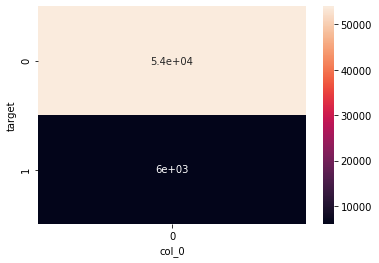

In [52]:
sb.heatmap(pd.crosstab(y_test,y_pred), annot=True)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53980
           1       0.00      0.00      0.00      6020

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



#### Precision = TP/TP+FP
#### recall    = TP/TP+FN
#### F1 Measure = 2*(Precision*recall)/(precision\+recall)

## Logistic Regression: WITH SMOTE: Training accuracy is 79% and Test Accuracy is 78% which is not good at all

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc = RandomForestClassifier(n_estimators=20,random_state=0)

In [100]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(n_estimators=20, random_state=0)

In [101]:
y_pred_rf = rfc.predict(X_test)

In [102]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     53980
           1       0.19      0.10      0.13      6020

    accuracy                           0.87     60000
   macro avg       0.55      0.52      0.53     60000
weighted avg       0.83      0.87      0.85     60000



In [103]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1
target,,
0,51519,2461
1,5447,573


### High Type I error

In [104]:
accuracy_score(y_train_smote,rfc.predict(X_train_smote))  #Training accuracy

0.9998689665030733

In [105]:
accuracy_score(y_test,y_pred_rf)  #Testing accuracy

0.8682

## Random Forest: WITH SMOTE: Training accuracy is 99% and Test Accuracy is 87% 

### Decison Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
dt = DecisionTreeClassifier()

In [108]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
y_dtpred = dt.predict(X_test)

In [110]:
pd.crosstab(y_test,y_dtpred)

col_0,0,1
target,,
0,48419,5561
1,4896,1124


In [111]:
accuracy_score(y_train_smote,dt.predict(X_train_smote))   #Training Accuracy

0.6443592064929083

In [112]:
accuracy_score(y_test,y_dtpred)   #Testing Accuracy

0.8257166666666667

In [113]:
print(classification_report(y_test,y_dtpred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     53980
           1       0.17      0.19      0.18      6020

    accuracy                           0.83     60000
   macro avg       0.54      0.54      0.54     60000
weighted avg       0.83      0.83      0.83     60000



In [114]:
from collections import Counter

In [115]:
print(Counter(y_test))

Counter({0: 53980, 1: 6020})


In [116]:
print(Counter(y_dtpred))

Counter({0: 53315, 1: 6685})


### XGBOOST

In [117]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_smote,y_train_smote)
y_pred_xg = model.predict(X_test)

In [118]:
accuracy_score(y_train_smote,model.predict(X_train_smote))   # Training Accuracy

0.9073076984164801

In [119]:
accuracy_score(y_test,y_pred_xg)    # Testing Accuracy

0.8066666666666666

In [120]:
pd.crosstab(y_test,y_pred_xg)

col_0,0,1
target,,
0,46610,7370
1,4230,1790


In [121]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     53980
           1       0.20      0.30      0.24      6020

    accuracy                           0.81     60000
   macro avg       0.56      0.58      0.56     60000
weighted avg       0.84      0.81      0.82     60000



### ANN

In [122]:
from sklearn.neural_network import MLPClassifier

In [123]:
ann = MLPClassifier(hidden_layer_sizes=(100,10),random_state=10)
ann.fit(X_train_smote, y_train_smote)

MLPClassifier(hidden_layer_sizes=(100, 10), random_state=10)

In [124]:
y_pred_ann = ann.predict(X_test)

In [125]:
accuracy_score(y_train_smote,ann.predict(X_train_smote))   #Training accuracy

0.9226743539651531

In [126]:
accuracy_score(y_test,y_pred_ann)   #Testing accuracy

0.8000666666666667

In [127]:
pd.crosstab(y_test,y_pred_ann)

col_0,0,1
target,,
0,46226,7754
1,4242,1778


In [128]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     53980
           1       0.19      0.30      0.23      6020

    accuracy                           0.80     60000
   macro avg       0.55      0.58      0.56     60000
weighted avg       0.84      0.80      0.82     60000



### ROC and AUC

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score

In [121]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_smote)          #Logistic Regression
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred_rf)       #Random Forest
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_pred_xg)       #XGBOOST
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_dtpred)         #Decision Tree
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_pred_ann)       #ANN

In [122]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred_smote))
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_pred_rf))
print('roc_auc_score for XGBOOST: ', roc_auc_score(y_test, y_pred_xg))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_dtpred))
print('roc_auc_score for ANN: ', roc_auc_score(y_test, y_pred_ann))

roc_auc_score for Logistic Regression:  0.7731419228728741
roc_auc_score for RandomForest:  0.5197373765846586
roc_auc_score for XGBOOST:  0.6084022136905632
roc_auc_score for DecisionTree:  0.5522147060742321
roc_auc_score for ANN:  0.6302245879180057


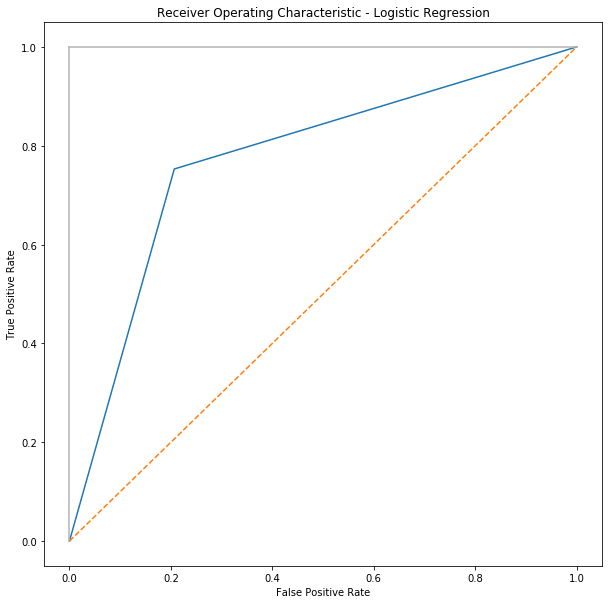

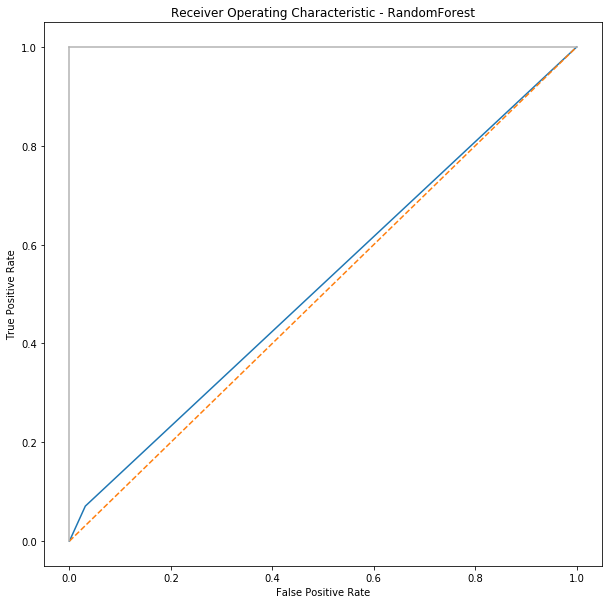

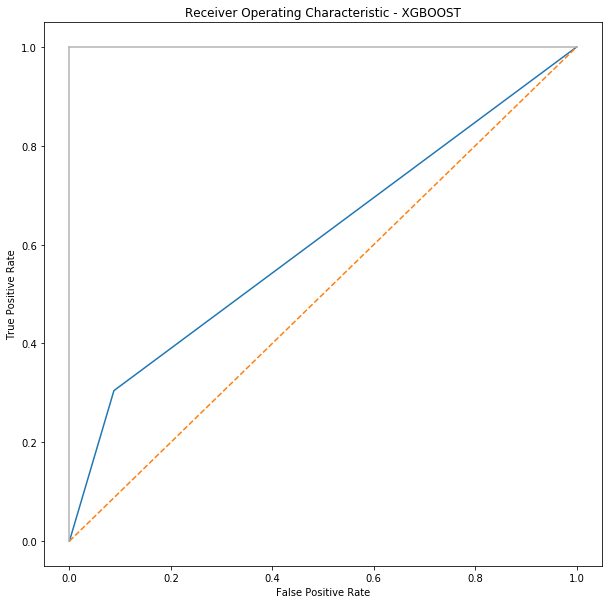

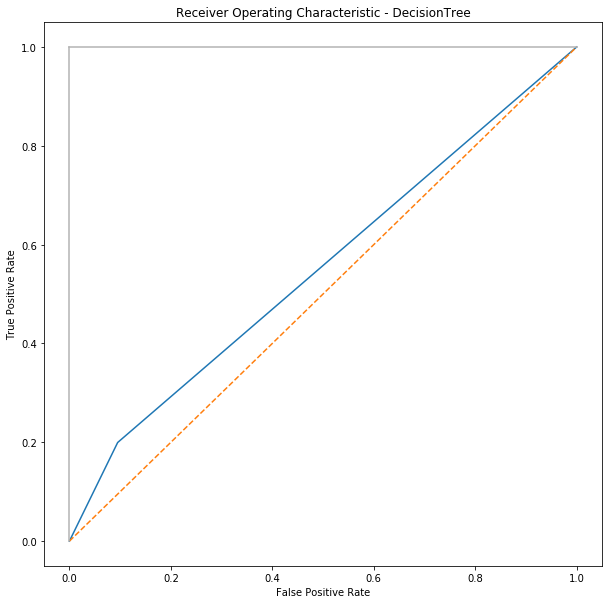

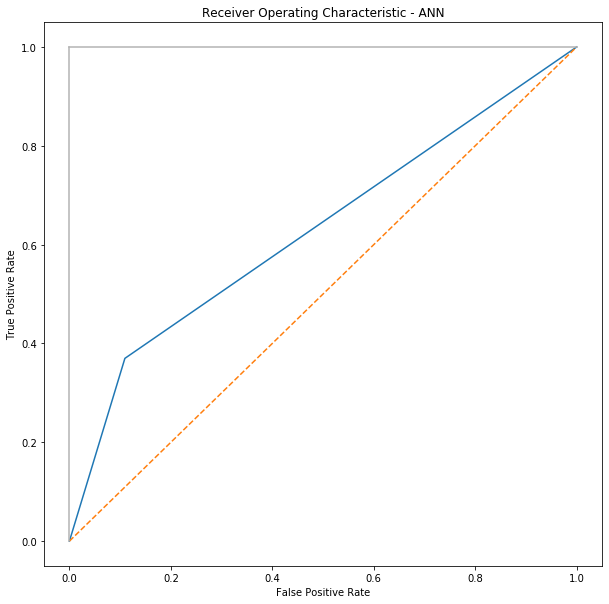

In [123]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBOOST')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ANN')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()